In [2]:
from META_TOOLBOX import *

In [3]:
# Portifolio dataset instace selected by user (https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f)
USER_INSTANCE = 'USA-1'
D = PORTIFOLIO_DIMENSION(USER_INSTANCE)
STOCKS, START_DAY, END_DAY, RISK_FREE_ASSET = PORTIFOLIO_TICKERS(USER_INSTANCE)

# Input variables portifolio problem
PORTIFOLIO_RETURNS, PORTIFOLIO_RISKS = STOCKS_RISK_AND_RETURN(STOCKS, START_DAY, END_DAY)

# Design space
X_L = [0.00001] * D
X_U = [0.99999] * D

# Setup FA method 
GAMMA = GAMMA_ASSEMBLY(X_L, X_U, D, 2)
PARAMETERS = {
              'ATTRACTIVENESS (BETA_0)': 0.98,
              'MIN. RANDOM FACTOR (ALPHA_MIN)': 0.20,
              'MAX. RANDOM FACTOR (ALPHA_MAX)': 0.95,
              'LIGHT ABSORPTION (GAMMA)': GAMMA,
              'THETA': 0.98,
              'TYPE ALPHA UPDATE': 'YANG 0',
              'SCALING (S_D)': True
             }
             
# Setup optimization
SETUP_FA = { 
              'N_REP': 30,
              'N_ITER': 500,
              'N_POP': 20,
              'D': D,
              'X_L': X_L,
              'X_U': X_U,
              'PARAMETERS': PARAMETERS,
              'NULL_DIC': {'RETURN': PORTIFOLIO_RETURNS, 'RISK': PORTIFOLIO_RISKS, 'RISK_FREE': RISK_FREE_ASSET, 'RP': 1E6}
            }

# OF Statement
def OF_FUNCTION(X, NULL_DIC):
    RET, VOL = PORTIFOLIO(X, NULL_DIC['RISK'], NULL_DIC['RETURN'])
    OF = SHARP(RET, VOL, NULL_DIC['RISK_FREE'])     
    OF *= -1  
    G_0 = sum(X) - 1
    PSEUDO_OF = OF + (G_0 ** 2) * NULL_DIC['RP']
    return PSEUDO_OF

def OF_FUNCTION_AUX(X, NULL_DIC):
    RET, VOL = PORTIFOLIO(X, NULL_DIC['RISK'], NULL_DIC['RETURN'])
    SHARP_INDEX = SHARP(RET, VOL, NULL_DIC['RISK_FREE'])     
    SUMA = sum(X)
    G_0 = sum(X) - 1
    return RET, VOL, SHARP_INDEX, SUMA, G_0
    
# Optimization
RESULTS_REP_FA, BEST_REP_FA, AVERAGE_REP_FA, WORST_REP_FA, SATUS_FA = FIREFLY_ALGORITHM_001(OF_FUNCTION, SETUP_FA)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Process Time: 196.95 Seconds 
 Seconds per repetition: 6.57
META_FA001_REP_0_BEST_0_20230621 153435.xlsx
META_FA001_REP_1_BEST_1_20230621 153436.xlsx
META_FA001_REP_2_BEST_2_20230621 153436.xlsx
META_FA001_REP_3_BEST_3_20230621 153436.xlsx
META_FA001_REP_4_BEST_4_20230621 153436.xlsx
META_FA001_REP_5_BEST_5_20230621 153436.xlsx
META_FA001_REP_6_BEST_6_20230621 153436.xlsx
META_FA001_REP_7_BEST_7_20230621 153436.xlsx
META_FA001_REP_8_BEST_8_20230621 153436.xlsx
META_FA001_REP_9_BEST_9_20230621 153436.xlsx
META_FA001_REP_10_BEST_10_20230621 153436.xlsx
META_FA001_REP_11_BEST_11_20230621 153437.xlsx
META_FA001_REP_12_BEST_12_20230621 153437.xlsx
META_FA001_REP_13_BEST_13_20230621 153437.xlsx
META_FA001_REP_14_BEST_14_20230621 153437.xlsx
META_FA001_REP_15_BEST_15_20230621 153437.xlsx
META_FA001_REP_16_BEST_16_20230621 153437.xlsx
META_FA001_REP_17_BEST_17_20230621 153437.xlsx
META_FA001_REP_18_BEST_18_20230621 

In [4]:
# Best dimension
BESTBEST_FA = SATUS_FA[0]
BEST = BEST_REP_FA[BESTBEST_FA]
DIMENSIONS = list(BEST['X_POSITION'][-1,:])

In [5]:
# Best Result and Cost
RET, VOL, SHARP_INDEX, SUMA, G_0 = OF_FUNCTION_AUX(DIMENSIONS, SETUP_FA['NULL_DIC'])

# Print
print('\n Optimization results:', '\n')
print(' - Design Variables: ', [f'{TIC}: {100 * PERC:.2f} %' for TIC, PERC in zip(STOCKS, DIMENSIONS)])
print(' - Sharp index:    {:.2f}'.format(SHARP_INDEX), '\n',
      '- Risk free (%):  {:.2f}'.format(RISK_FREE_ASSET * 100), '\n',
      '- Return (%):     {:.2f}'.format(RET * 100), '\n',
      '- Risk (%):       {:.2f}'.format(VOL * 100), '\n',
      '- Constrain:      {:.6e}'.format(G_0), '\n',
      '- sum(x):         {:.6e}'.format(SUMA))


 Optimization results: 

 - Design Variables:  ['AAPL: 47.79 %', 'AMZN: 29.86 %', 'META: 22.35 %', 'GOOGL: 0.00 %']
 - Sharp index:    1.55 
 - Risk free (%):  1.78 
 - Return (%):     30.10 
 - Risk (%):       18.31 
 - Constrain:      4.676765e-05 
 - sum(x):         1.000047e+00


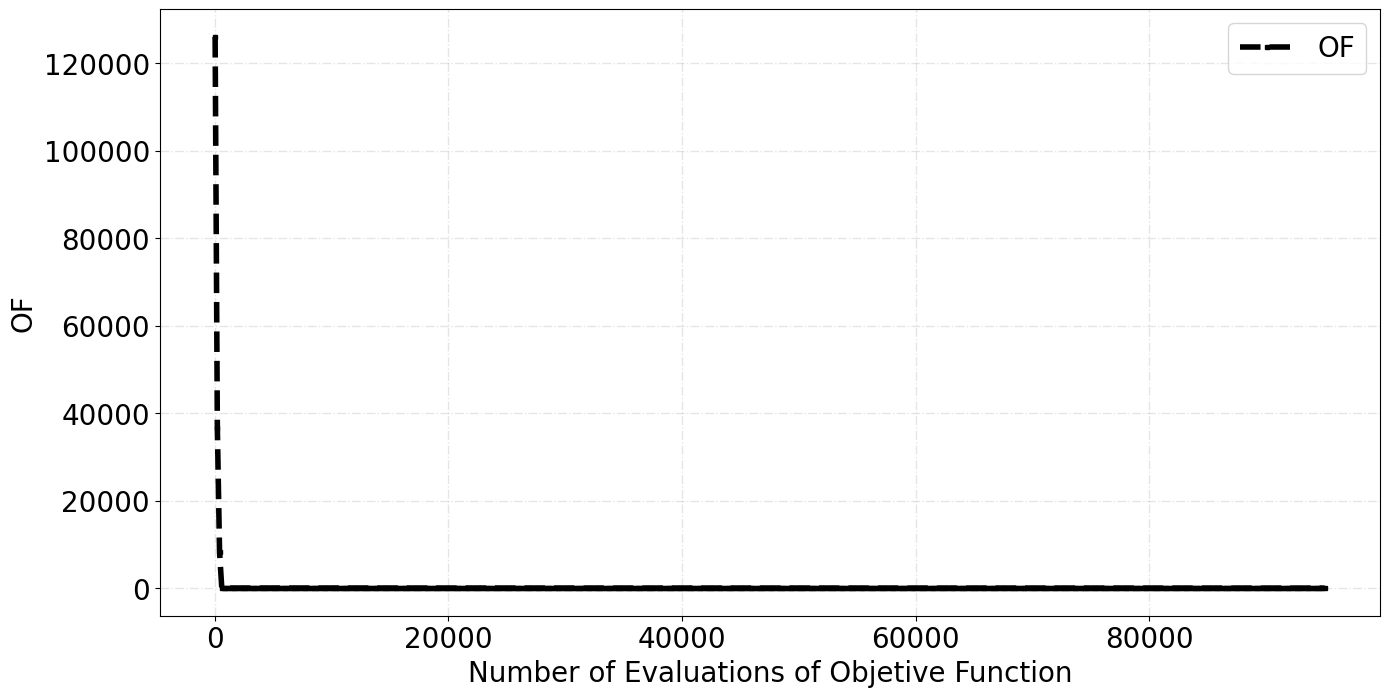

In [7]:
from EASYPLOT_TOOLBOX import *
# Graphics
LEGEND = ['OF']
LINE_STY = ['--']
COLORS = ['#000000']

# Chart setup
PLOT_SETUP = {
              'NAME': 'line chart',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'MARKER': 's',
              'MARKER SIZE': 3,
              'LINE WIDTH': 4,
              'LINE STYLE': LINE_STY,
              'Y AXIS LABEL': 'OF',
              'Y AXIS SIZE': 20,
              'X AXIS LABEL': 'Number of Evaluations of Objetive Function',
              'X AXIS SIZE': 20,
              'AXISES COLOR': '#000000',
              'LABELS SIZE': 20,
              'LABELS COLOR': '#000000',
              'CHART COLOR': COLORS,
              'ON GRID?': True,
              'LOC LEGEND': 'upper right',
              'SIZE LEGEND': 20,
              'Y LOG': False,
              'X LOG': False,
              'DPI': 600, 
              'EXTENSION': 'svg'
             }

# Data statement 
DATASET = {'X': list(BEST['NEOF']), 'Y': [list(BEST['OF'])], 'LEGEND': LEGEND}

# Call function
LINE_CHART(DATASET, PLOT_SETUP)